# Solution 1 - Using OLS

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
LOADFILE = "../data/hw_1_data.xlsx"
info = pd.read_excel(LOADFILE,sheet_name='info').rename(columns={'Unnamed: 0':'Ticker'}).set_index('Ticker')
info

,ETF Description
Ticker,
SPY,Domestic Equity SPDR S&P500
EFA,Foreign Equity iShares EAFE
EEM,iShares Emerging Markets
PSP,Private Equity Invesco Global Private Equity
QAI,Absolute Return IQ Multi-Strat
HYG,High Yield iShares High Yield Corporate Bond
DBC,Invesco DB Commodity Index Tracking Fund
IYR,Real Estate iShares US Real Estate
IEF,Domestic Bonds iShares 7-10 Year Treasury


In [3]:
rets = pd.read_excel(LOADFILE,sheet_name='security returns').set_index('Date')
rets

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022882,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017952,0.000554
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022727,-0.020773,0.053672,0.019967,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024862,-0.005571,0.005149,0.001981,0.000600
2009-07-31,0.074607,0.100415,0.110146,0.143247,0.015325,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
2009-08-31,0.036939,0.045031,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007633,0.007628,0.008414,0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,-0.052741,-0.036350,-0.000205,-0.086028,-0.020761,-0.026549,0.078922,-0.082314,-0.021130,-0.026176,-0.020588,-0.000815
2022-02-28,-0.029517,-0.034292,-0.043202,-0.073602,-0.006746,-0.008591,0.064674,-0.045881,-0.003041,-0.011197,0.008557,-0.000363
2022-03-31,0.037590,0.005190,-0.033811,-0.007721,-0.002587,-0.012871,0.091747,0.068646,-0.040609,-0.042240,-0.018755,-0.000363


In [4]:
port =  pd.read_excel(LOADFILE,sheet_name='portfolio returns').set_index('Date')
port

,portfolio
Date,
2009-04-30,0.130446
2009-05-31,0.020928
2009-06-30,0.002895
2009-07-31,0.068172
2009-08-31,0.042209
...,...
2022-01-31,-0.052559
2022-02-28,-0.032318
2022-03-31,0.004432


# Regression

## 1

In [5]:
X = sm.add_constant(rets['SPY'])
y = port
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     455.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.93e-48
Time:                        18:21:19   Log-Likelihood:                 443.21
No. Observations:                 158   AIC:                            -882.4
Df Residuals:                     156   BIC:                            -876.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.479      0.633      -0.003       0.002
SPY            0.6142      0.029     21.342      0.000       0.557       0.671
==============================================================================
Omnibus:                       21.658   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.437
Skew:                           0.448   Prob(JB):                     6.17e-15
Kurtosis:                       6.023   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2

In [6]:
X = sm.add_constant(rets[['SPY', 'HYG']])
y = port
mod_multi = sm.OLS(y, X).fit()
mod_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     384.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           8.57e-61
Time:                        18:21:19   Log-Likelihood:                 476.28
No. Observations:                 158   AIC:                            -946.6
Df Residuals:                     155   BIC:                            -937.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.915      0.362      -0.003       0.001
SPY            0.3843      0.035     11.072      0.000       0.316       0.453
HYG            0.5166      0.058      8.977      0.000       0.403       0.630
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.296
Skew:                           0.214   Prob(JB):                        0.523
Kurtosis:                       2.886   Cond. No.                         66.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include CL1. Also note that the R-squared is much higher.

## 3

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

In [7]:
corr_port = port.corrwith(mod.fittedvalues)[0]
corr_port_multi = port.corrwith(mod_multi.fittedvalues)[0]
print(f'Correlation between portfolio and replication: {corr_port_multi:.2%}.')
print(f'Square of this correaltion is {corr_port_multi**2:.2%}\nwhich equals the R-squared.')

Correlation between portfolio and replication: 91.22%.
Square of this correaltion is 83.21%
which equals the R-squared.


## 4

In [8]:
TICKreg1 = 'SPY'
TICKreg2 = 'HYG'
corrREGS = rets[TICKreg2].corr(rets[TICKreg1])
print(f'Correlation between {TICKreg1} and {TICKreg2} is {corrREGS:.1%}')

Correlation between SPY and HYG is 73.8%


The beta for SPY in (2) is much smaller than in (1). This is because HYG and SPY are significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by HYG. Thus, in eq (2) this gets attributed more directly to HYG, and less is attributed to SPY.

## 5

Without doing calculation, the intuition is that the second regression includes HYG as a regressor. Sample residuals are always uncorrelated (in-sample) to the regressors. Thus, in this regression we know the sample residual will have zero correlation to HYG. In the first regression, HYG was not a regressor, so it may have substantial correlation to the sample residual.

For population residuals, $\epsilon$, we still expect much smaller correlation to HYG in the second regression, though this population residual may still have some correlation to HYG.

In [9]:
print(f'Correlation between {TICKreg2} and the sample residual:\nUnivariate = {TICKreg1}: {rets[TICKreg2].corr(mod.resid):.2%}')
print(f'Multivariate = {TICKreg1} and {TICKreg2}: {rets[TICKreg2].corr(mod_multi.resid):.2%}')

Correlation between HYG and the sample residual:
Univariate = SPY: 39.46%
Multivariate = SPY and HYG: -0.00%


# 2. Decomposing and Replicating

## 1

In [10]:
X = sm.add_constant(rets)
y = port
mod_exact = sm.OLS(y, X).fit()
display(mod_exact.params.to_frame().rename(columns={0:'weights'}).sort_values('weights',ascending=False).T.style.format('{:.2f}'))
mod_exact.summary()

,QAI,IEF,IYR,PSP,const,TIP,BWX,HYG,SPY,EEM,DBC,EFA,SHV
weights,0.25,0.25,0.25,0.25,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.609e+28
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:21:20   Log-Likelihood:                 5392.1
No. Observations:                 158   AIC:                        -1.076e+04
Df Residuals:                     145   BIC:                        -1.072e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.526e-16   3.94e-17      8.960      0.000    2.75e-16     4.3e-16
SPY        -5.274e-16   2.12e-15     -0.248      0.804   -4.72e-15    3.67e-15
EFA        -8.361e-16   2.04e-15     -0.410      0.683   -4.87e-15     3.2e-15
EEM        -5.794e-16   1.23e-15     -0.471      0.638   -3.01e-15    1.85e-15
PSP            0.2500   1.53e-15   1.64e+14      0.000       0.250       0.250
QAI            0.2500   5.48e-15   4.56e+13      0.000       0.250       0.250
HYG        -3.539e-16   2.46e-15     -0.144      0.886   -5.22e-15    4.52e-15
DBC        -6.713e-16    8.6e-16     -0.780      0.436   -2.37e-15    1.03e-15
IYR            0.2500   1.03e-15   2.42e+14      0.000       0.250       0.250
IEF            0.2500   3.97e-15    6.3e+13      0.000       0.250       0.250
BWX        -1.527e-16   2.44e-15     -0.062      0.950   -4.98e-15    4.68e-15
TIP        -1.388e-16    4.2e-15     -0.033      0.974   -8.44e-15    8.16e-15
SHV        -2.019e-15   4.31e-14     -0.047      0.963   -8.72e-14    8.32e-14
==============================================================================
Omnibus:                       13.115   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.155
Skew:                          -0.262   Prob(JB):                     2.83e-07
Kurtosis:                       5.075   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2.2

In [11]:
T1 = '2018'
T2 = '2019'
TICKrep = 'TIP'

rets_IS = rets.loc[:T1,:]

X = sm.add_constant(rets_IS.drop(columns=TICKrep))
y = rets_IS[[TICKrep]]
mod_replicate = sm.OLS(y, X).fit()
mod_replicate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TIP   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     22.16
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.17e-22
Time:                        18:21:20   Log-Likelihood:                 410.59
No. Observations:                 117   AIC:                            -797.2
Df Residuals:                     105   BIC:                            -764.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.199      0.233      -0.001       0.003
SPY           -0.0385      0.057     -0.670      0.505      -0.152       0.075
EFA           -0.0213      0.048     -0.442      0.660      -0.117       0.074
EEM            0.0676      0.028      2.424      0.017       0.012       0.123
PSP            0.0291      0.038      0.769      0.444      -0.046       0.104
QAI            0.0880      0.127      0.695      0.489      -0.163       0.339
HYG           -0.0805      0.060     -1.347      0.181      -0.199       0.038
DBC            0.0759      0.021      3.600      0.000       0.034       0.118
IYR            0.0250      0.026      0.950      0.344      -0.027       0.077
IEF            0.6629      0.072      9.201      0.000       0.520       0.806
BWX        -4.003e-05      0.056     -0.001      0.999      -0.111       0.111
SHV           -1.8066      1.448     -1.248      0.215      -4.677       1.064
==============================================================================
Omnibus:                        4.571   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.120
Skew:                          -0.342   Prob(JB):                        0.127
Kurtosis:                       3.614   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is reported in the table above.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. 
- It does not need to be between 0 and 1.

The stats-models Python package puts a "Note" at the bottom of the table above reminding users of that fact.

### See the t-stats below, in descending order:

In [12]:
mod_replicate.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,IEF,DBC,EEM,const,IYR,PSP,QAI,BWX,EFA,SPY,SHV,HYG
t-stats,9.2,3.6,2.4,1.2,0.9,0.8,0.7,-0.0,-0.4,-0.7,-1.2,-1.3


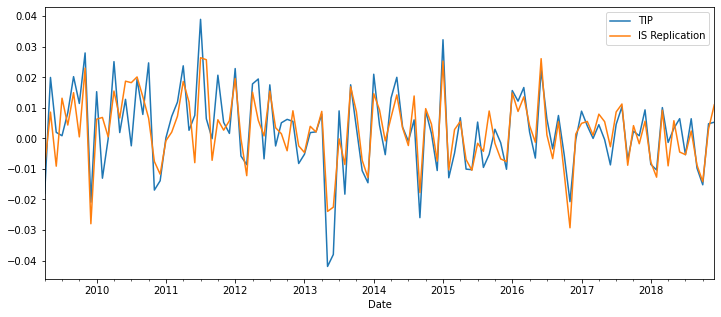

In [13]:
pd.concat([y, mod_replicate.fittedvalues.rename('IS Replication')], axis=1).plot(figsize=(12, 5))
plt.show()

## 2.3

In [14]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [15]:
rets_OOS = rets.loc[T2:,:]
X = sm.add_constant(rets_OOS.drop(columns=TICKrep))
y = rets_OOS[[TICKrep]]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [16]:
print(f'Correlation between {TICKrep} and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between TIP and Replicating Portfolio
In-Sample: 83.6%
Out-of-Sample: 80.0%


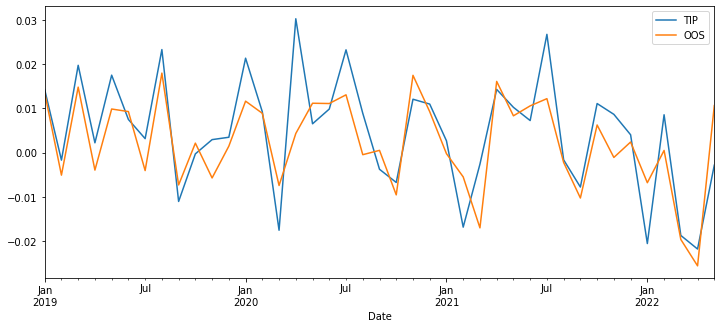

In [17]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()